In [70]:
from pathlib import Path
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import spacy
import re
from spacy.lang.en.stop_words import STOP_WORDS



# Path to the data

In [2]:
BASE_DIR = Path.cwd()
train_data_dir = BASE_DIR / "msrp/msr_paraphrase_train.txt"


## Reading the file

In [3]:
def readfile(path):
    with path.open(mode="r", encoding="utf-8") as file:
        file_contents = file.read()

    return file_contents

# Preprocessing the data

In [4]:
def preprocess(path):
    data = readfile(path)
    d = data.split("\n")
    val = [i.split("\t") for i in d]
    return val


## Visualizating our data

In [5]:
data = preprocess(train_data_dir)

df = pd.DataFrame(data[1:], columns=data[0])
df = df.dropna()


In [6]:
df.head()

,﻿Quality,#1 ID,#2 ID,#1 String,#2 String
0,1,702876,702977,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi..."
1,0,2108705,2108831,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...
2,1,1330381,1330521,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an..."
3,0,3344667,3344648,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ..."
4,1,1236820,1236712,"The stock rose $2.11, or about 11 percent, to ...",PG&E Corp. shares jumped $1.63 or 8 percent to...


In [7]:
df.count()

Quality     4076
#1 ID        4076
#2 ID        4076
#1 String    4076
#2 String    4076
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4076 entries, 0 to 4075
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ﻿Quality   4076 non-null   object
 1   #1 ID      4076 non-null   object
 2   #2 ID      4076 non-null   object
 3   #1 String  4076 non-null   object
 4   #2 String  4076 non-null   object
dtypes: object(5)
memory usage: 191.1+ KB


In [9]:
x = df["#1 String"]
y = df["#2 String"]



In [10]:
plt_list = []
leng = 0
for text in x:
    plt_list.append(len(text))
    leng =leng + len(text)

leng/len(x)


115.795142296369

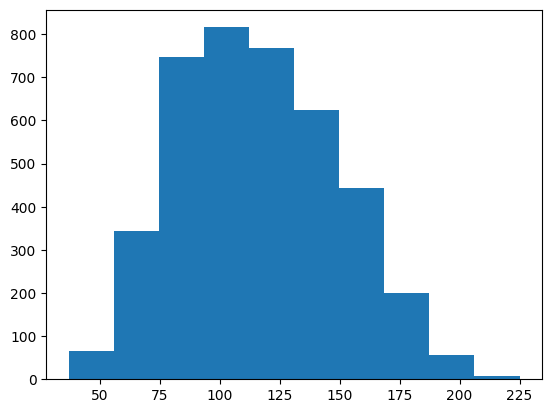

In [11]:
plt.hist(plt_list);

In [12]:
x

0       Amrozi accused his brother, whom he called "th...
1       Yucaipa owned Dominick's before selling the ch...
2       They had published an advertisement on the Int...
3       Around 0335 GMT, Tab shares were up 19 cents, ...
4       The stock rose $2.11, or about 11 percent, to ...
                              ...                        
4071    "At this point, Mr. Brando announced: 'Somebod...
4072    Martin, 58, will be freed today after serving ...
4073    "We have concluded that the outlook for price ...
4074    The notification was first reported Friday by ...
4075    The 30-year bond US30YT=RR rose 22/32 for a yi...
Name: #1 String, Length: 4076, dtype: object

In [13]:
a = [i.split(" ") for i in x]

In [14]:
a

[['Amrozi',
  'accused',
  'his',
  'brother,',
  'whom',
  'he',
  'called',
  '"the',
  'witness",',
  'of',
  'deliberately',
  'distorting',
  'his',
  'evidence.'],
 ['Yucaipa',
  'owned',
  "Dominick's",
  'before',
  'selling',
  'the',
  'chain',
  'to',
  'Safeway',
  'in',
  '1998',
  'for',
  '$2.5',
  'billion.'],
 ['They',
  'had',
  'published',
  'an',
  'advertisement',
  'on',
  'the',
  'Internet',
  'on',
  'June',
  '10,',
  'offering',
  'the',
  'cargo',
  'for',
  'sale,',
  'he',
  'added.'],
 ['Around',
  '0335',
  'GMT,',
  'Tab',
  'shares',
  'were',
  'up',
  '19',
  'cents,',
  'or',
  '4.4%,',
  'at',
  'A$4.56,',
  'having',
  'earlier',
  'set',
  'a',
  'record',
  'high',
  'of',
  'A$4.57.'],
 ['The',
  'stock',
  'rose',
  '$2.11,',
  'or',
  'about',
  '11',
  'percent,',
  'to',
  'close',
  'Friday',
  'at',
  '$21.51',
  'on',
  'the',
  'New',
  'York',
  'Stock',
  'Exchange.'],
 ['Revenue',
  'in',
  'the',
  'first',
  'quarter',
  'of',
  '

In [18]:
nlp = spacy.load("en_core_web_sm")


In [19]:
text

"The 30-year bond US30YT=RR rose 22/32 for a yield of 4.31 percent, versus 4.35 percent at Wednesday's close."

In [39]:
def remove_special_symbols(text):
    # Remove special symbols using regex
    processed_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return processed_text

In [40]:
word = []

for words in x:
    words = remove_special_symbols(words)
    for w in words.split(" "):
        doc = nlp(w.lower())
        text = [token.lemma_ for token in doc]
        word.extend(text)

In [41]:
word

['amrozi',
 'accuse',
 'his',
 'brother',
 'whom',
 'he',
 'call',
 'the',
 'witness',
 'of',
 'deliberately',
 'distort',
 'his',
 'evidence',
 'yucaipa',
 'own',
 'dominick',
 'before',
 'sell',
 'the',
 'chain',
 'to',
 'safeway',
 'in',
 '1998',
 'for',
 '25',
 'billion',
 'they',
 'have',
 'publish',
 'an',
 'advertisement',
 'on',
 'the',
 'internet',
 'on',
 'june',
 '10',
 'offer',
 'the',
 'cargo',
 'for',
 'sale',
 'he',
 'add',
 'around',
 '0335',
 'gmt',
 'tab',
 'share',
 'be',
 'up',
 '19',
 'cent',
 'or',
 '44',
 'at',
 'a456',
 'have',
 'early',
 'set',
 'a',
 'record',
 'high',
 'of',
 'a457',
 'the',
 'stock',
 'rise',
 '211',
 'or',
 'about',
 '11',
 'percent',
 'to',
 'close',
 'friday',
 'at',
 '2151',
 'on',
 'the',
 'new',
 'york',
 'stock',
 'exchange',
 'revenue',
 'in',
 'the',
 'first',
 'quarter',
 'of',
 'the',
 'year',
 'drop',
 '15',
 'percent',
 'from',
 'the',
 'same',
 'period',
 'a',
 'year',
 'early',
 'the',
 'nasdaq',
 'have',
 'a',
 'weekly',
 'ga

In [42]:
len(word)

77312

In [43]:
word = sorted(set(word))

In [29]:
word

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'s",
 "'ve",
 '(',
 ')',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '.01',
 '.20',
 '.85',
 '.com',
 '.dji',
 '.ixic',
 '.net',
 '.spx',
 '/',
 '0',
 '0.01',
 '0.02',
 '0.03',
 '0.07',
 '0.08',
 '0.09',
 '0.1',
 '0.10',
 '0.11',
 '0.12',
 '0.13',
 '0.18',
 '0.2',
 '0.20',
 '0.21',
 '0.24',
 '0.27',
 '0.28',
 '0.29',
 '0.3',
 '0.30',
 '0.33',
 '0.35',
 '0.37',
 '0.39',
 '0.4',
 '0.44',
 '0.45',
 '0.47',
 '0.49',
 '0.5',
 '0.51',
 '0.54',
 '0.59',
 '0.6',
 '0.60',
 '0.6199',
 '0.65',
 '0.67',
 '0.68',
 '0.7',
 '0.71',
 '0.76',
 '0.8',
 '0.86',
 '0.9',
 '0.94',
 '0.96',
 '0.98',
 '0.99',
 '01',
 '0215',
 '0240',
 '0335',
 '05',
 '0520',
 '05d',
 '1',
 '1,000',
 '1,004.63',
 '1,012.67',
 '1,020.18',
 '1,039.32',
 '1,071.99',
 '1,075',
 '1,100',
 '1,121',
 '1,147',
 '1,199',
 '1,200',
 '1,206.50',
 '1,366',
 '1,417',
 '1,440',
 '1,486.14',
 '1,499',
 '1,500',
 '1,504.04',
 '1,506,76',
 '1,514.77',
 '1,516',
 '1,517.05',
 '1,520.15',
 '1,540',

In [55]:
x[1]

"Yucaipa owned Dominick's before selling the chain to Safeway in 1998 for $2.5 billion."

In [63]:
datas = [(x[i], y[i]) for i in range(len(x))]



In [48]:


max_vocab = 100000
text_vector = layers.TextVectorization(max_tokens = max_vocab,
                                      output_sequence_length = 55)
embedding = layers.Embedding(max_vocab, 
                            180,
                            mask_zero = True)

text_vector.adapt(x)

In [ ]:
inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vector(inputs)
x = embedding(x)
x = layers.Conv1D(64,2, activation ="tanh")(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation = "tanh")(x)
outputs = layers.Dense(max_vocab, activation = "softmax")(x)

model_1 = tf.keras.Model(inputs, outputs)

In [65]:
# Tokenization
tokens = []
for sentence in datas:
    sentence_tokens = []
    for word in sentence:
        doc = nlp(word)
        word_tokens = [token.text for token in doc if token.text.lower() not in STOP_WORDS]
        sentence_tokens.extend(word_tokens)
    tokens.append(sentence_tokens)

# Flatten the Tokens
dataset = [token for sentence_tokens in tokens for token in sentence_tokens]


In [66]:
print(dataset)

['Amrozi', 'accused', 'brother', ',', 'called', '"', 'witness', '"', ',', 'deliberately', 'distorting', 'evidence', '.', 'Referring', '"', 'witness', '"', ',', 'Amrozi', 'accused', 'brother', 'deliberately', 'distorting', 'evidence', '.', 'Yucaipa', 'owned', 'Dominick', 'selling', 'chain', 'Safeway', '1998', '$', '2.5', 'billion', '.', 'Yucaipa', 'bought', 'Dominick', '1995', '$', '693', 'million', 'sold', 'Safeway', '$', '1.8', 'billion', '1998', '.', 'published', 'advertisement', 'Internet', 'June', '10', ',', 'offering', 'cargo', 'sale', ',', 'added', '.', 'June', '10', ',', 'ship', 'owners', 'published', 'advertisement', 'Internet', ',', 'offering', 'explosives', 'sale', '.', '0335', 'GMT', ',', 'Tab', 'shares', '19', 'cents', ',', '4.4', '%', ',', 'A$', '4.56', ',', 'having', 'earlier', 'set', 'record', 'high', 'A$', '4.57', '.', 'Tab', 'shares', 'jumped', '20', 'cents', ',', '4.6', '%', ',', 'set', 'record', 'closing', 'high', 'A$', '4.57', '.', 'stock', 'rose', '$', '2.11', ',',

In [ ]:
def tokenization(documents):

    training_data =[]

    for document in documents:
        bag = []
    
        
        word_pattern = document[0]
                
        
        for word in words:
            bag.append(1) if word in word_pattern else bag.append(0)

        output_row = list(output_empty)
        output_row[classes.index(document[1])] = 1
        training_data.append([bag, output_row]) 
    
    

In [51]:
sequence_length = 180  # Length of input/output sequences
vocab_size = 100000 # Size of the vocabulary
# Preprocess and organize your training data into input-output pairs

# Build the Transformer Model
d_model = 256  # Dimensionality of the model
num_layers = 4  # Number of encoder and decoder layers
num_heads = 8  # Number of attention heads
dff = 1024  # Dimensionality of the feed-forward network
rate = 0.1  # Dropout rate
learning_rate = 0.001  # Learning rate for optimizer
num_epochs = 10  # Number of training epochs
max_length = 200  # Maximum length of the generated output

In [71]:



inputs = keras.Input(shape=(sequence_length,), dtype=tf.int32)
embedding_layer = layers.Embedding(vocab_size, d_model)(inputs)

# Positional Encoding
position = tf.keras.layers.Embedding(sequence_length, d_model)(tf.range(sequence_length))
position_encoding = position + embedding_layer

# Encoder Layers
for _ in range(num_layers):
    attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
    attention_output = attention(position_encoding, position_encoding)
    attention_output = layers.Dropout(rate)(attention_output)
    attention_output = layers.LayerNormalization(epsilon=1e-6)(attention_output + position_encoding)
    
    ffn = keras.Sequential([
        layers.Dense(dff, activation='relu'),
        layers.Dense(d_model)
    ])
    ffn_output = ffn(attention_output)
    ffn_output = layers.Dropout(rate)(ffn_output)
    position_encoding = layers.LayerNormalization(epsilon=1e-6)(ffn_output + attention_output)

outputs = layers.Dense(vocab_size, activation='softmax')(position_encoding)

transformer = keras.Model(inputs=inputs, outputs=outputs)

# Define Loss Function and Metrics
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy()

# Define Training Step
@tf.function
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = transformer(inputs, training=True)
        loss = loss_fn(targets, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    accuracy_metric(targets, predictions)
    return loss

# Configure Optimizer and Initialize Metrics
learning_rate = 0.001  # Learning rate for optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
accuracy_metric.reset_states()



In [ ]:
for epoch in range(num_epochs):
    for inputs, targets in dataset:
        loss = train_step(inputs, targets)

    print(f'Epoch {epoch + 1}, Loss: {loss:.4f}, Accuracy: {accuracy_metric.result() * 100:.2f}%')

In [ ]:
def generate_text(input_sequence, max_length):
    for _ in range(max_length):
        predictions = transformer(input_sequence, training=False)
        predicted_id = tf.argmax(predictions, axis=-1)[:, -1:]
        input_sequence = tf.concat([input_sequence, predicted_id], axis=-1)

    return input_sequence